# Digestive AI classifier


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
import fastai 
!python --version

Python 3.6.9


In [ ]:
torch.__version__

'1.7.0+cu101'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/myAI-Projects/Colonoscopy-polyps-detection-with-CNNs/Veronica/data/Dataset_valid_train/'

train  valid


In [ ]:
path = '/content/drive/My Drive/myAI-Projects/Colonoscopy-polyps-detection-with-CNNs/Veronica/data/Dataset_valid_train/'

In [ ]:
import numpy as np
np.random.seed(2020)
bs= 128

In [ ]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [ ]:
print(data.classes)
len(data.classes),data.c

['Esophagitis', 'Normal', 'Polyps', 'Ulcerative colitis']


(4, 4)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.928875,0.476103,0.847500,02:14


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.605265,0.412685,0.870000,01:53
1,0.554966,0.355951,0.858750,01:53
2,0.491677,0.324006,0.867500,01:53
3,0.415726,0.308105,0.875000,01:53
4,0.383871,0.311131,0.873750,01:53


In [ ]:
learn.save('./digestive-resnet34_0.87')

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


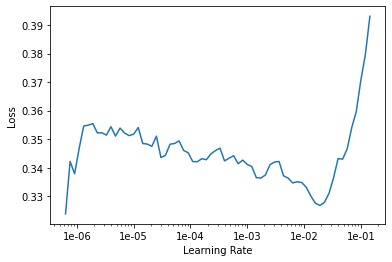

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(2e-6, 2e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.428604,0.572699,0.853750,01:56
1,0.402415,0.542588,0.886250,01:54
2,0.327190,0.256726,0.920000,01:55
3,0.250775,0.217705,0.921250,01:55
4,0.186551,0.213173,0.917500,01:54


In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 4e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.081309,0.392731,0.908750,01:55
1,0.181181,0.854795,0.866250,01:54
2,0.224527,0.408494,0.898750,01:55
3,0.193457,0.287763,0.926250,01:56
4,0.139705,0.257547,0.930000,01:57


In [ ]:
learn.save('./digestive-resnet34_0.93')

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-8, 4e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.068800,0.258995,0.927500,01:56
1,0.073812,0.256054,0.930000,01:57
2,0.070702,0.256901,0.931250,01:55
3,0.068740,0.260596,0.932500,01:54
4,0.068346,0.250907,0.932500,01:55


In [ ]:
learn.save('./digestive-resnet34_0.9325')

In [ ]:
learn.load('./digestive-resnet34_0.9325')
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6, 4e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.066509,0.250723,0.930000,01:54
1,0.060237,0.307356,0.923750,01:54
2,0.069497,0.297726,0.922500,01:55
3,0.055997,0.268017,0.931250,01:55
4,0.047501,0.264610,0.927500,01:55


In [ ]:
learn.load('./digestive-resnet34_0.9325')
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.057346,0.262412,0.927500,01:55
1,0.138737,1.213417,0.791250,01:55
2,0.184994,0.273123,0.897500,01:54
3,0.155876,0.234504,0.927500,01:54
4,0.118387,0.209741,0.937500,01:55


In [ ]:
learn.save('./digestive-resnet34_0.9375')

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.054623,0.237606,0.932500,01:55
1,0.086589,0.741967,0.851250,01:56
2,0.125407,0.241709,0.921250,01:55
3,0.108891,0.237297,0.927500,01:55
4,0.086267,0.219428,0.937500,01:55


In [ ]:
learn.save('./digestive-resnet34_0.937500')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

[('Normal', 'Esophagitis', 21),
 ('Esophagitis', 'Normal', 17),
 ('Polyps', 'Normal', 4),
 ('Ulcerative colitis', 'Polyps', 4),
 ('Ulcerative colitis', 'Normal', 3)]

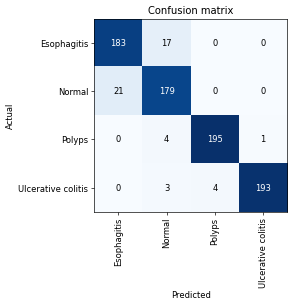

In [ ]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [ ]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

Check the worst predictions:

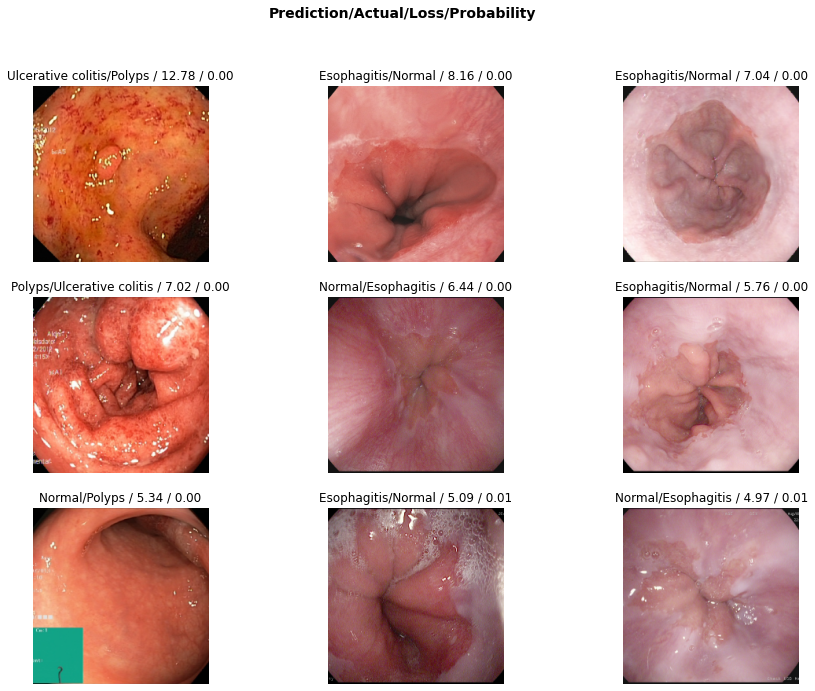

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

Load a trained network and export it for the Webapp:

In [ ]:
learn.load('/content/drive/My Drive/myAI-Projects/Colonoscopy-polyps-detection-with-CNNs/Veronica/data/models/digestive-resnet34_0.937500')

In [ ]:
learn.export(file = Path('/content/drive/My Drive/myAI-Projects/Colonoscopy-polyps-detection-with-CNNs/Veronica/data/models/export.pkl'))

Web app
https://towardsdatascience.com/building-web-app-for-computer-vision-model-deploying-to-production-in-10-minutes-a-detailed-ec6ac52ec7e4